In [1]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("fraud_data.csv")

In [5]:
df.shape

(14446, 15)

In [6]:
df.size

216690

In [7]:
df.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,04-01-2019 00:58,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,04-01-2019 15:06,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,04-01-2019 22:37,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,04-01-2019 23:06,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,04-01-2019 23:59,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [8]:
df.tail()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",01-09-1956,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",09-11-1939,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0
14445,22-01-2019 00:55,Daugherty-Thompson,food_dining,50.09,Unionville,MO,40.4815,-92.9951,3805,"""Investment banker, corporate""",15-09-1950,65e7370f473f9b9d75796c8033a7c929,40.387243,-92.224871,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

In [10]:
df.describe()

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [11]:
df.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(63)

In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

In [14]:
import re

# Clean is_fraud column: extract only 0 or 1
df['is_fraud'] = df['is_fraud'].astype(str).str.extract(r'(\d)').astype(int)

# Check unique values
print(df['is_fraud'].unique())

[1 0]


In [15]:
# Convert is_fraud to integer
df['is_fraud'] = df['is_fraud'].astype(int)


In [16]:
# Remove unnecessary quotes in text columns
df['merchant'] = df['merchant'].str.replace('"', '', regex=False)
df['job'] = df['job'].str.replace('"', '', regex=False)

In [17]:

# Drop duplicates if any
df.drop_duplicates(inplace=True)

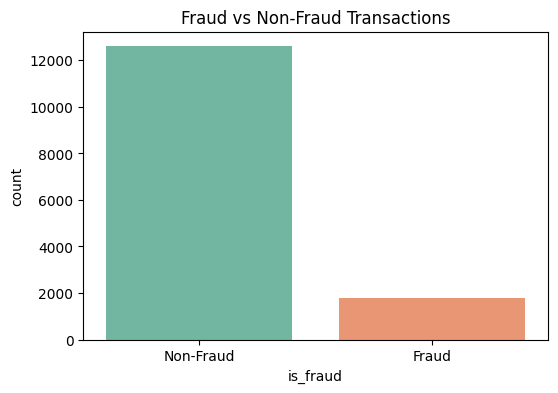

In [18]:

plt.figure(figsize=(6,4))
sns.countplot(x="is_fraud", data=df, palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0,1], ["Non-Fraud", "Fraud"])
plt.show()

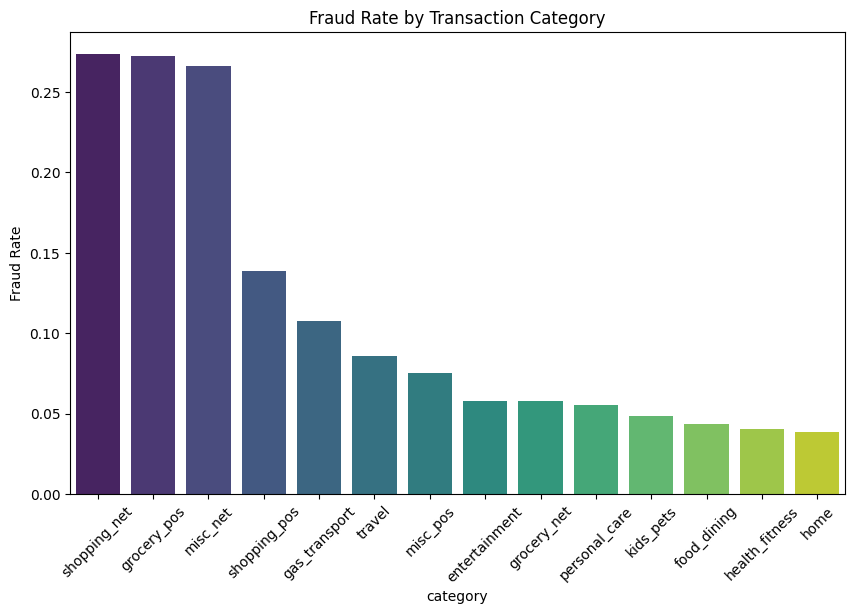

In [19]:
# Fraud rate by category
plt.figure(figsize=(10,6))
fraud_by_cat = df.groupby("category")["is_fraud"].mean().sort_values(ascending=False)
sns.barplot(x=fraud_by_cat.index, y=fraud_by_cat.values, palette="viridis")
plt.title("Fraud Rate by Transaction Category")
plt.xticks(rotation=45)
plt.ylabel("Fraud Rate")
plt.show()

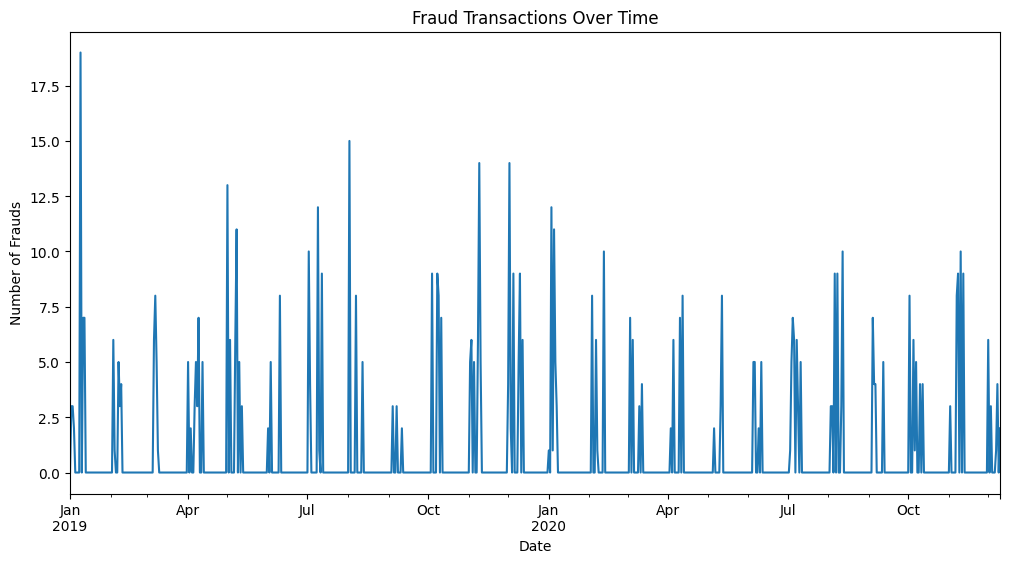

In [20]:
# Fraud transactions over time (daily trend)
plt.figure(figsize=(12,6))
df.set_index("trans_date_trans_time").resample("D")["is_fraud"].sum().plot()
plt.title("Fraud Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Frauds")
plt.show()

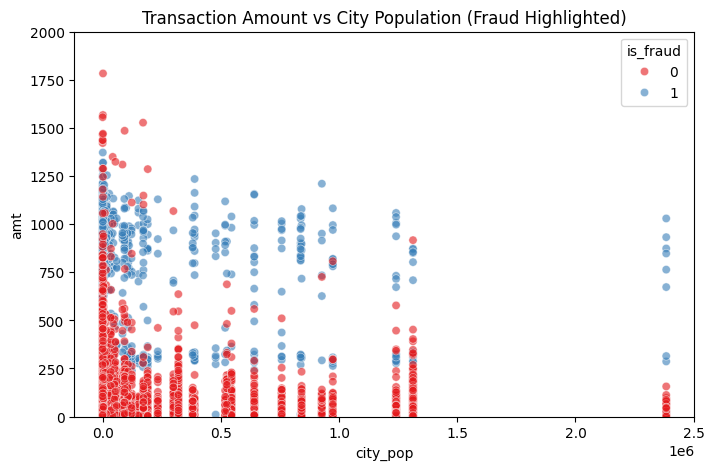

In [21]:

# Fraud vs City Population
plt.figure(figsize=(8,5))
sns.scatterplot(x="city_pop", y="amt", hue="is_fraud", data=df, alpha=0.6, palette="Set1")
plt.title("Transaction Amount vs City Population (Fraud Highlighted)")
plt.ylim(0,2000)
plt.show()

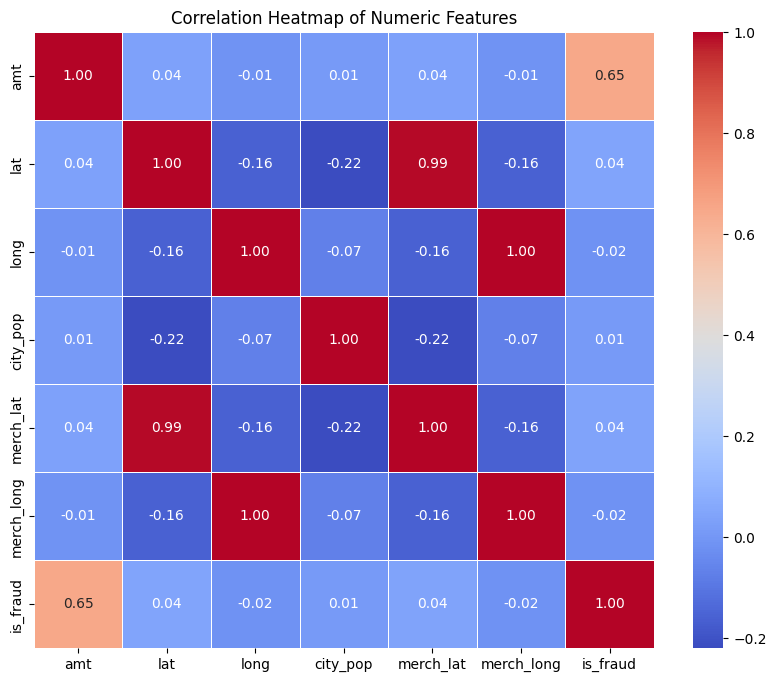

In [22]:
# 1. Correlation Heatmap

plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [23]:
# Feature engineering: add age
df['age'] = (pd.to_datetime("2020-01-01") - df['dob']).dt.days // 365

# Drop unused columns
df = df.drop(columns=['trans_num','dob'])

In [24]:
# Split features/labels
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [25]:
# Drop datetime column since it can't be directly scaled
X = X.drop(columns=['trans_date_trans_time'])

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors="coerce")

# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Standardize numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [28]:
import numpy as np

# Check for missing values in NumPy array
print("Missing values in X_train:")
print("Total NaN values:", np.isnan(X_train).sum())
print("NaN values per column:", np.isnan(X_train).sum(axis=0))
print("Shape of X_train:", X_train.shape)

# Check which rows have NaN values
rows_with_nan = np.isnan(X_train).any(axis=1)
print(f"Number of rows with NaN: {rows_with_nan.sum()}")

Missing values in X_train:
Total NaN values: 57214
NaN values per column: [10068 10068     0 10068 10068     0     0     0 10068     0     0  6874]
Shape of X_train: (10068, 12)
Number of rows with NaN: 10068


In [29]:
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(strategy='mean') 

# Fit and transform
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now fit the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_imputed, y_train)
print(classification_report(y_test, logreg.predict(X_test_imputed)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3780
           1       0.85      0.53      0.65       535

    accuracy                           0.93      4315
   macro avg       0.90      0.76      0.81      4315
weighted avg       0.93      0.93      0.92      4315



Text(0.5, 265.9917874396136, 'Predicted Label')

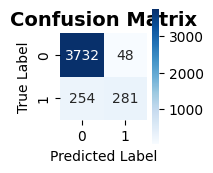

In [30]:
# Get predictions and probabilities
y_pred = logreg.predict(X_test_imputed)
y_pred_proba = logreg.predict_proba(X_test_imputed)[:, 1]
#  CONFUSION MATRIX
plt.subplot(2, 4, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
            cbar_kws={'shrink': 0.8})
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')


In [31]:
# Preprocessing pipeline
def preprocess_data(X_train, X_test):
    imputer = SimpleImputer(strategy='mean')
    X_train_processed = imputer.fit_transform(X_train)
    X_test_processed = imputer.transform(X_test)
    return X_train_processed, X_test_processed, imputer

# Get processed data
X_train_processed, X_test_processed, imputer = preprocess_data(X_train, X_test)


In [32]:
from sklearn.metrics import accuracy_score, classification_report

Decision Tree Results:
Accuracy: 0.951
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3780
           1       0.85      0.74      0.79       535

    accuracy                           0.95      4315
   macro avg       0.91      0.86      0.88      4315
weighted avg       0.95      0.95      0.95      4315



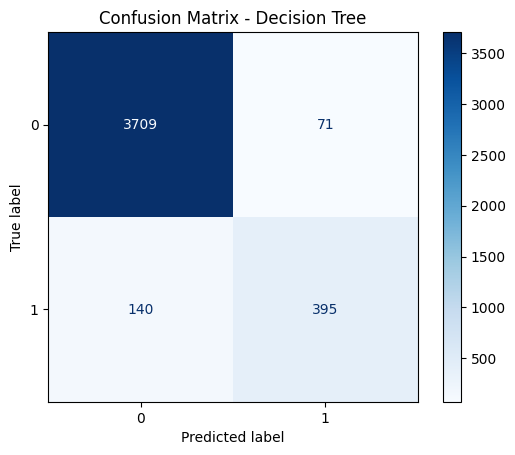

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train_processed, y_train)
dt_pred = dt_model.predict(X_test_processed)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred):.3f}")
print(classification_report(y_test, dt_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Random Forest Results:
Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3780
           1       0.85      0.75      0.80       535

    accuracy                           0.95      4315
   macro avg       0.91      0.86      0.88      4315
weighted avg       0.95      0.95      0.95      4315



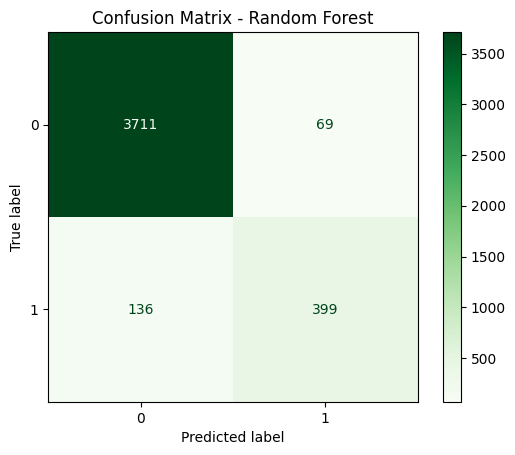

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_pred = rf_model.predict(X_test_processed)

# Print Results
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.3f}")
print(classification_report(y_test, rf_pred))

# Generate and Display Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()


2. GRADIENT BOOSTING
XGBoost Results:
Accuracy: 0.949
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3780
           1       0.82      0.74      0.78       535

    accuracy                           0.95      4315
   macro avg       0.89      0.86      0.88      4315
weighted avg       0.95      0.95      0.95      4315



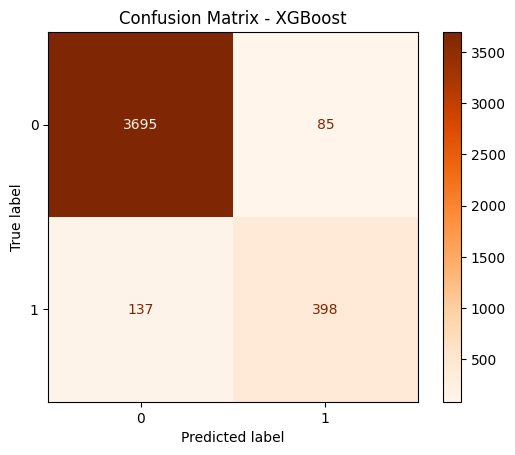


LightGBM Results:
Accuracy: 0.953
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3780
           1       0.86      0.75      0.80       535

    accuracy                           0.95      4315
   macro avg       0.91      0.87      0.89      4315
weighted avg       0.95      0.95      0.95      4315



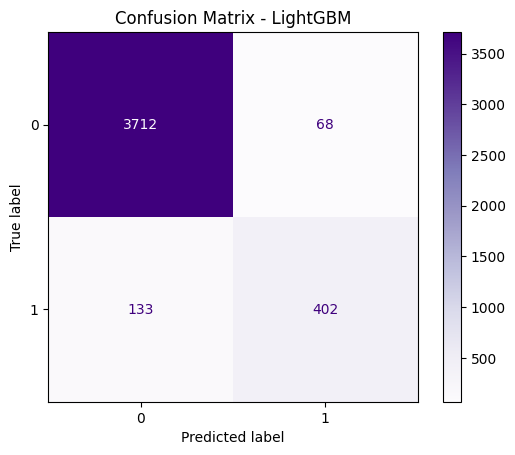

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n2. GRADIENT BOOSTING")
print("="*50)

try:
    import xgboost as xgb
    import lightgbm as lgb

    # XGBoost
    xgb_model = xgb.XGBClassifier(random_state=42, eval_metric="logloss")
    xgb_model.fit(X_train_processed, y_train)
    xgb_pred = xgb_model.predict(X_test_processed)

    print("XGBoost Results:")
    print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.3f}")
    print(classification_report(y_test, xgb_pred))

    # Confusion Matrix - XGBoost
    cm_xgb = confusion_matrix(y_test, xgb_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_).plot(
        cmap="Oranges", values_format="d")
    plt.title("Confusion Matrix - XGBoost")
    plt.show()

    # LightGBM
    lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)
    lgb_model.fit(X_train_processed, y_train)
    lgb_pred = lgb_model.predict(X_test_processed)

    print("\nLightGBM Results:")
    print(f"Accuracy: {accuracy_score(y_test, lgb_pred):.3f}")
    print(classification_report(y_test, lgb_pred))

    # Confusion Matrix - LightGBM
    cm_lgb = confusion_matrix(y_test, lgb_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=lgb_model.classes_).plot(
        cmap="Purples", values_format="d")
    plt.title("Confusion Matrix - LightGBM")
    plt.show()

except ImportError:
    print("Install XGBoost & LightGBM with: pip install xgboost lightgbm")
    from sklearn.ensemble import GradientBoostingClassifier
    gb_model = GradientBoostingClassifier(random_state=42)
    gb_model.fit(X_train_processed, y_train)
    gb_pred = gb_model.predict(X_test_processed)

    print("Gradient Boosting (sklearn) Results:")
    print(f"Accuracy: {accuracy_score(y_test, gb_pred):.3f}")
    print(classification_report(y_test, gb_pred))

    # Confusion Matrix - Sklearn GradientBoosting
    cm_gb = confusion_matrix(y_test, gb_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb_model.classes_).plot(
        cmap="Blues", values_format="d")
    plt.title("Confusion Matrix - Sklearn Gradient Boosting")
    plt.show()


SVM Results:
Accuracy: 0.934
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3780
           1       0.84      0.59      0.69       535

    accuracy                           0.93      4315
   macro avg       0.89      0.78      0.83      4315
weighted avg       0.93      0.93      0.93      4315



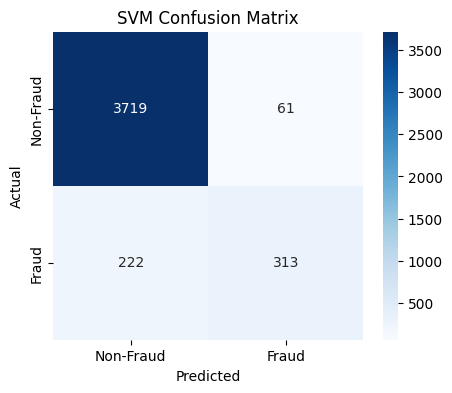

In [36]:
# Train SVM model (RBF kernel works well in most cases)
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_processed, y_train)

# Predictions
svm_pred = svm_model.predict(X_test_processed)

# Evaluation
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred):.3f}")
print(classification_report(y_test, svm_pred))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Non-Fraud","Fraud"], yticklabels=["Non-Fraud","Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


 Training Autoencoder...
Epoch 1/20 | Train Loss: 1.1105 | Val Loss: 1.1623
Epoch 2/20 | Train Loss: 1.1111 | Val Loss: 1.1623
Epoch 3/20 | Train Loss: 1.1102 | Val Loss: 1.1623
Epoch 4/20 | Train Loss: 1.1100 | Val Loss: 1.1623
Epoch 5/20 | Train Loss: 1.1106 | Val Loss: 1.1623
Epoch 6/20 | Train Loss: 1.1107 | Val Loss: 1.1623
Epoch 7/20 | Train Loss: 1.1110 | Val Loss: 1.1623
Epoch 8/20 | Train Loss: 1.1100 | Val Loss: 1.1623
Epoch 9/20 | Train Loss: 1.1105 | Val Loss: 1.1623
Epoch 10/20 | Train Loss: 1.1101 | Val Loss: 1.1623
Epoch 11/20 | Train Loss: 1.1099 | Val Loss: 1.1623
Epoch 12/20 | Train Loss: 1.1115 | Val Loss: 1.1623
Epoch 13/20 | Train Loss: 1.1106 | Val Loss: 1.1623
Epoch 14/20 | Train Loss: 1.1103 | Val Loss: 1.1623
Epoch 15/20 | Train Loss: 1.1107 | Val Loss: 1.1623
Epoch 16/20 | Train Loss: 1.1111 | Val Loss: 1.1623
Epoch 17/20 | Train Loss: 1.1105 | Val Loss: 1.1623
Epoch 18/20 | Train Loss: 1.1109 | Val Loss: 1.1623
Epoch 19/20 | Train Loss: 1.1107 | Val Loss: 1.1

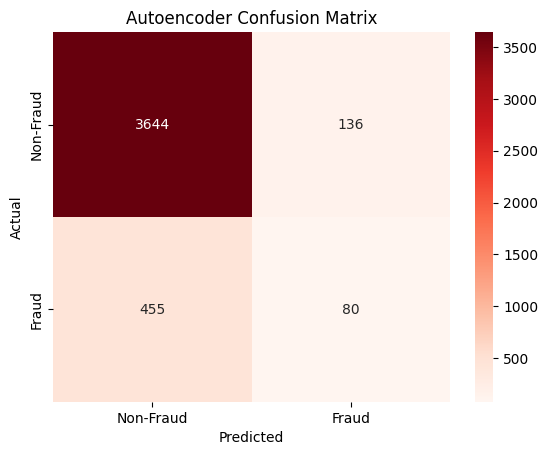

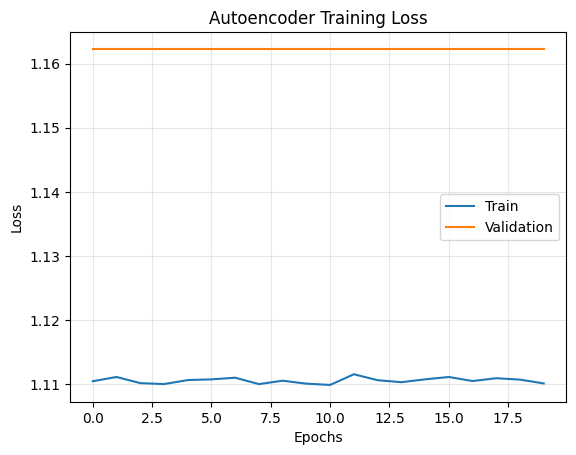


 Autoencoder training and evaluation completed!


In [40]:
# ===============================
# PyTorch Autoencoder (Simplified)
# ===============================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split


# Data Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

# Autoencoder Model

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        hidden = input_dim // 2
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden), nn.ReLU(),
            nn.Linear(hidden, hidden // 2), nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(hidden // 2, hidden), nn.ReLU(),
            nn.Linear(hidden, input_dim)
        )

    def forward(self, x):  # Encoding + Decoding
        return self.decoder(self.encoder(x))


# Setup

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_dim = X_train_scaled.shape[1]
model = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare Data
X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)


# Training Loop

epochs = 20
train_losses, val_losses = [], []
print(" Training Autoencoder...")

for epoch in range(epochs):
    # ---- Train ----
    model.train()
    train_loss = sum(criterion(model(xb), xb).item() for xb, _ in train_loader) / len(train_loader)

    # ---- Validate ----
    model.eval()
    with torch.no_grad():
        val_loss = sum(criterion(model(xb), xb).item() for xb, _ in val_loader) / len(val_loader)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

# Reconstruction Error & Threshold

model.eval()
with torch.no_grad():
    recon = model(X_test_tensor)
    mse = torch.mean((X_test_tensor - recon) ** 2, dim=1).cpu().numpy()

threshold = np.percentile(mse, 95)
y_pred_ae = (mse > threshold).astype(int)


# Evaluation

print("\n Autoencoder Results:")
print(classification_report(y_test, y_pred_ae))

cm = confusion_matrix(y_test, y_pred_ae)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds",
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Autoencoder Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Training Loss Plot

plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title("Autoencoder Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n Autoencoder training and evaluation completed!")
